# Kaggle Restaurant Revenue Prediction
datasets from https://www.kaggle.com/c/restaurant-revenue-prediction

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Import the data as a pandas data frame

In [266]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [267]:
# Check for null values
train_df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

The ID column is not needed to train the model, so this will be dropped for the training and test set. 
* Id : Restaurant id. 
* Open Date : opening date for a restaurant
* City : City that the restaurant is in. Note that there are unicode in the names. 
* City Group: Type of the city. Big cities, or Other. 
* Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
* Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [268]:
ID = test_df['Id']
train_df=train_df.drop('Id',axis=1)
test_df=test_df.drop('Id',axis=1)
train_df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [269]:
test_df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


I am curious of how correlated the parameters P1-P37 are. A heatmap visualizes which parameters are highly correlated.

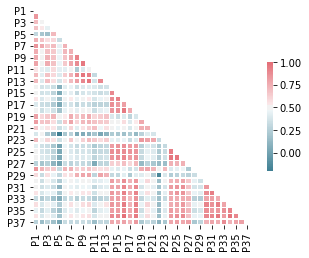

In [270]:
# compute the correlation
corr = train_df[["P"+str(i) for i in range(1,38)]].corr()

# set a mask since the correlation matrix is symmetrical along the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
                             
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [271]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_df[["P"+str(i) for i in range(1,38)]] = scaler.fit_transform(train_df[["P"+str(i) for i in range(1,38)]])
test_df[["P"+str(i) for i in range(1,38)]] = scaler.transform(test_df[["P"+str(i) for i in range(1,38)]])

Since there are a large number of highly correlated parameters, this is a good situation to use principal component analysis (PCA) to reduce the number of features in the model

In [272]:
from sklearn.decomposition import PCA

pca = PCA(n_components=37)
pca.fit(train_df[["P"+str(i) for i in range(1,38)]])

PCA(copy=True, iterated_power='auto', n_components=37, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The explained variance ratio represents the fraction of the variance attributed to each principal component, ordered by the highest variance. A cumulative sum must add up to 1. As we can see, 90% of the variance can be explained with just 5 principal components.

7

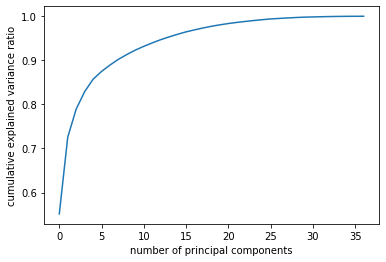

In [273]:
# plot the cumulative explain variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance ratio')

# compute the number of components to explain 90% of the variance
np.argmin(np.abs(np.cumsum(pca.explained_variance_ratio_) -0.9))

Re-fit the PCA to the training set for 5 components, and apply the same transformation to the test set.

In [274]:
components = 8
pca = PCA(n_components=components)
train_pca = pd.DataFrame(pca.fit_transform(train_df[["P"+str(i) for i in range(1,38)]]), columns=['PCA'+str(i) for i in range(0,components)])
test_pca = pd.DataFrame(pca.transform(test_df[["P"+str(i) for i in range(1,38)]]), columns=['PCA'+str(i) for i in range(0,components)])
train_pca.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,0.797436,-2.125021,-0.065702,-0.016322,-0.440947,1.707248,1.182256,-0.952889
1,-2.528972,0.572364,0.100643,-1.352795,-0.041713,0.276260,0.230418,0.836592
2,-3.066027,0.187874,-1.152090,0.664442,1.174567,-0.055370,-0.043515,0.481703
3,10.754111,0.560106,-2.876801,3.290394,-2.476937,0.583470,2.543319,-0.215871
4,-0.066251,-2.511757,-1.098275,-0.099905,0.453485,1.337359,-0.066226,-0.731331


In [275]:
test_pca.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,-2.539916,0.188168,0.676457,0.915057,-0.608198,-1.230616,-0.022309,-0.391809
1,-2.862643,0.215102,0.339047,0.339112,-0.362278,-0.031993,0.392210,0.246528
2,-1.988362,1.052622,1.862488,-0.004683,-1.252397,0.652613,0.323944,0.177217
3,-2.138006,0.164788,0.160281,0.457192,-0.194991,-0.189020,0.476376,0.171259
4,-2.705075,0.347934,0.324414,0.050070,-0.155324,-0.787456,-0.017151,-0.304100


Drop the original parameters and join the PCA to the dataframes

In [276]:
train_df = train_df.drop(["P"+str(i) for i in range(1,38)], axis=1).join(train_pca)
test_df = test_df.drop(["P"+str(i) for i in range(1,38)], axis=1).join(test_pca)
train_df.head()

,Open Date,City,City Group,Type,revenue,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,07/17/1999,İstanbul,Big Cities,IL,5653753.0,0.797436,-2.125021,-0.065702,-0.016322,-0.440947,1.707248,1.182256,-0.952889
1,02/14/2008,Ankara,Big Cities,FC,6923131.0,-2.528972,0.572364,0.100643,-1.352795,-0.041713,0.276260,0.230418,0.836592
2,03/09/2013,Diyarbakır,Other,IL,2055379.0,-3.066027,0.187874,-1.152090,0.664442,1.174567,-0.055370,-0.043515,0.481703
3,02/02/2012,Tokat,Other,IL,2675511.0,10.754111,0.560106,-2.876801,3.290394,-2.476937,0.583470,2.543319,-0.215871
4,05/09/2009,Gaziantep,Other,IL,4316715.0,-0.066251,-2.511757,-1.098275,-0.099905,0.453485,1.337359,-0.066226,-0.731331


Convert the string dates to a python datetime format

In [277]:
train_df['Open Date']=pd.to_datetime(train_df['Open Date'])
test_df['Open Date']=pd.to_datetime(test_df['Open Date'])
train_df.head()

,Open Date,City,City Group,Type,revenue,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,1999-07-17,İstanbul,Big Cities,IL,5653753.0,0.797436,-2.125021,-0.065702,-0.016322,-0.440947,1.707248,1.182256,-0.952889
1,2008-02-14,Ankara,Big Cities,FC,6923131.0,-2.528972,0.572364,0.100643,-1.352795,-0.041713,0.276260,0.230418,0.836592
2,2013-03-09,Diyarbakır,Other,IL,2055379.0,-3.066027,0.187874,-1.152090,0.664442,1.174567,-0.055370,-0.043515,0.481703
3,2012-02-02,Tokat,Other,IL,2675511.0,10.754111,0.560106,-2.876801,3.290394,-2.476937,0.583470,2.543319,-0.215871
4,2009-05-09,Gaziantep,Other,IL,4316715.0,-0.066251,-2.511757,-1.098275,-0.099905,0.453485,1.337359,-0.066226,-0.731331


Find how long a restaurant has been open relative to the newest restaurant opening.

In [278]:
refDate = train_df['Open Date'].max()
train_df['Open Date'] = (refDate - train_df['Open Date']).apply(lambda x: x.days)
test_df['Open Date'] = (refDate - test_df['Open Date']).apply(lambda x: x.days)
train_df.head()

,Open Date,City,City Group,Type,revenue,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,5306,İstanbul,Big Cities,IL,5653753.0,0.797436,-2.125021,-0.065702,-0.016322,-0.440947,1.707248,1.182256,-0.952889
1,2172,Ankara,Big Cities,FC,6923131.0,-2.528972,0.572364,0.100643,-1.352795,-0.041713,0.276260,0.230418,0.836592
2,322,Diyarbakır,Other,IL,2055379.0,-3.066027,0.187874,-1.152090,0.664442,1.174567,-0.055370,-0.043515,0.481703
3,723,Tokat,Other,IL,2675511.0,10.754111,0.560106,-2.876801,3.290394,-2.476937,0.583470,2.543319,-0.215871
4,1722,Gaziantep,Other,IL,4316715.0,-0.066251,-2.511757,-1.098275,-0.099905,0.453485,1.337359,-0.066226,-0.731331


Istanbul generates the most revenue on average


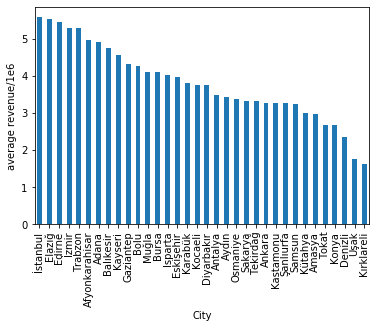

In [279]:
ax = (train_df[['City','revenue']].groupby(by='City').mean().sort_values(by='revenue',ascending=False)/1e6).plot.bar(legend=False)
ax.set_ylabel('average revenue/1e6')
print('Istanbul generates the most revenue on average')

Istanbul also has the highest number of restaurants.


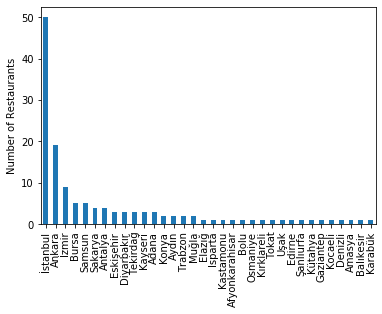

In [280]:
ax2 = train_df['City'].value_counts().plot.bar()
ax2.set_ylabel('Number of Restaurants')
print('Istanbul also has the highest number of restaurants.')

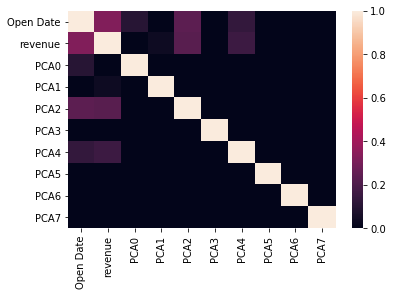

In [281]:
# check the correlation of the PCs, revenue and open date so far
sns.heatmap(train_df.corr(),vmax=1, vmin=0)

Next, the city, city group and type are categorical variable that should be one-hot encoded.

In [282]:
cityOnehot=pd.get_dummies(train_df['City'])
cityGroupOnehot=pd.get_dummies(train_df['City Group'])
cityTypeOnehot=pd.get_dummies(train_df['Type'])

cityOnehottest=pd.get_dummies(test_df['City'])
cityGroupOnehottest=pd.get_dummies(test_df['City Group'])
cityTypeOnehottest=pd.get_dummies(test_df['Type'])

In [283]:
train_df2 = train_df.drop(['City','City Group','Type'], axis=1).join(cityOnehot).join(cityGroupOnehot).join(cityTypeOnehot)
test_df2 = test_df.drop(['City','City Group','Type'], axis=1).join(cityOnehottest).join(cityGroupOnehottest).join(cityTypeOnehottest)

Not all cities are common to the train and test set, so we need to add the missing columns to each set

In [284]:
# check the shape before
print(test_df2.shape)
print(train_df2.shape)

# find column names
testcol=test_df2.columns.tolist()
traincol=train_df2.drop('revenue',axis=1).columns.tolist()

# find the common column names
commoncol=set(traincol).intersection(set(testcol))

# determine which cities are missing in each set
testcolmissing = list(set(traincol)-commoncol)
traincolmissing = list(set(testcol)-commoncol)

# insert missing columns with 0 for one-hot encoding
for i in traincolmissing:
    train_df2[i]=0
    
for i in testcolmissing:    
    test_df2[i]=0

(100000, 72)
(137, 49)


Check that the shapes are the same (train will have one extra column for revenue)

In [285]:
print(test_df2.shape)
print(train_df2.shape)

(100000, 78)
(137, 79)


In [286]:
y = train_df2['revenue']
X = train_df2.drop('revenue',axis=1)
X_test = test_df2[X_train.columns]

Check distribution of the revenue. The revenue is not normally distributed. Machine learning models rely on the data being normally distributed.

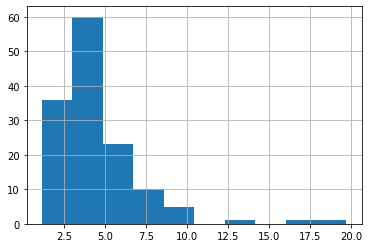

In [287]:
(y_train/1e6).hist()

Applying the log transforms the distribution to be more Gaussian

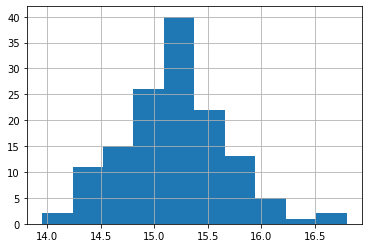

In [288]:
(np.log(y_train)).hist()

## Machine Learning: Evaluate RMSE from validation set
Split the training data into a training subset and validation subset

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

### Random Forest

In [295]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=200)
RFR.fit(X_train,np.log(y_train))
ypred = RFR.predict(X_valid)

In [225]:
# apply model to test set, take the exponential to undo the log
y_test_predict = RFR.predict(X_test)
y_test_predict = np.exp(y_test_predict)

In [226]:
y_test_predict

array([4064921.78997965, 3529353.75386596, 2875063.08549578, ...,
       2869797.36172982, 3359264.44216847, 4829679.58780512])

In [296]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.exp(ypred),y_valid))/1e6

2.8216015121307634

### Decision Tree

In [315]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=50)
tree.fit(X_train,np.log(y_train))
ypred = tree.predict(X_valid)
np.sqrt(mean_squared_error(np.exp(ypred),y_valid))/1e6

3.4221563674060578

### SVM

In [298]:
from sklearn.svm import LinearSVR
linSVR = LinearSVR(max_iter=2000)
linSVR.fit(X_train,np.log(y_train))
ypred = linSVR.predict(X_valid)
np.sqrt(mean_squared_error(np.exp(ypred),y_valid))/1e6

C:\Users\rthai_000\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


5.122382884782319

In [299]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(X_train,np.log(y_train))
ypred = SVR.predict(X_valid)
np.sqrt(mean_squared_error(np.exp(ypred),y_valid))/1e6

2.8258793014983796

### kNN

In [305]:
from sklearn.neighbors import KNeighborsRegressor
kNN = KNeighborsRegressor(n_neighbors=3)
kNN.fit(X_train,np.log(y_train/1e6))
ypred = kNN.predict(X_valid)
np.sqrt(mean_squared_error(np.exp(ypred),y_valid/1e6))

2.7701976926125904

In [543]:
submission_df = test_df2
submission_df['Prediction']=y_test_predict
submission_df = submission_df.join(ID)
submission_df = submission_df[['Id','Prediction']]
test_df2=test_df2.drop('Prediction',axis=1)

In [544]:
submission_df.to_csv('Submissions_Predict_Restaurant_Revenue.csv',index=False)

In [545]:
print(train_df2.shape)
X_train.shape

(137, 108)


(137, 107)

In [309]:
import xgboost as xgb
param = {'max_depth':200, 
         'subsample':1,
         'min_child_weight':1,
         'eta':0.3, 
         'num_round':100, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse'}


progress = dict()
xgbtrain = xgb.DMatrix(X_train.values,np.log(y_train.values))
watchlist  = [(xgbtrain,'train-rmse')]

bst = xgb.train(param, xgbtrain)
preds = np.exp(bst.predict(xgb.DMatrix(X_valid.values)))
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(preds,y_valid)))
y_predictxg = np.exp(bst.predict(xgb.DMatrix(X_test.values)))

[20:18:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


3544004.837784005


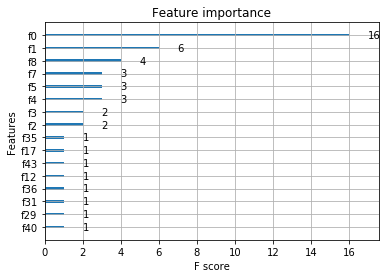

In [260]:
xgb.plot_importance(bst)

In [308]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(preds,y_valid))/1e6

3.544004837784005

In [549]:
submission_df = test_df2
submission_df['Prediction']= y_predictxg
submission_df = submission_df.join(ID)
submission_df = submission_df[['Id','Prediction']]
test_df2=test_df2.drop('Prediction',axis=1)

In [550]:
submission_df

,Id,Prediction
0,0,1770978.875
1,1,1801879.375
2,2,1727319.875
3,3,2033264.500
4,4,2033264.500
...,...,...
99995,99995,2728021.000
99996,99996,2317178.750
99997,99997,1943428.500
99998,99998,2287650.500


In [551]:
submission_df.to_csv('Submissions_Predict_Restaurant_Revenue_xg.csv',index=False)